# SVM 예제

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.svm import SVC, LinearSVC

In [2]:
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])

scaler = StandardScaler()
X = scaler.fit_transform(X)

svm_classifier = SVC(gamma='auto')
svm_classifier.fit(X, y)

SVC(gamma='auto')

In [3]:
X

array([[-0.63245553, -1.        ],
       [-1.26491106, -1.        ],
       [ 0.63245553,  1.        ],
       [ 1.26491106,  1.        ]])

In [4]:
x_pts = np.array([-1, -2, 1, 2])
y_pts = np.array([-1, -1, 1, 1])
label = y

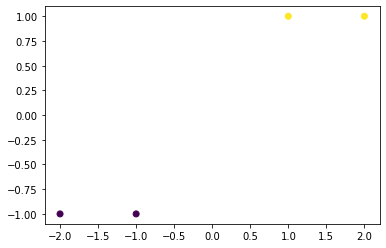

In [5]:
plt.scatter(x_pts, y_pts, c=label)

In [6]:
svm_classifier.predict(np.array([-1, 0]).reshape(1, -1))

array([1])

In [7]:
svm_classifier.predict(np.array([1, 0.5]).reshape(1, -1))

array([2])

In [8]:
svm_classifier.predict(scaler.transform(np.array([-1, 0]).reshape(1, -1)))

array([1])

In [9]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# svm_classifier = SVC(gamma='auto')
# svm_classifier.fit(X, y)

pipeline = make_pipeline(StandardScaler(), SVC(gamma='auto'))
pipeline.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [10]:
pipeline.predict(np.array([-1, 0]).reshape(1, -1))

array([1])

In [11]:
pipeline.predict(np.array([1, 0.5]).reshape(1, -1))

array([2])

In [12]:
X, y = make_blobs(n_samples=40, centers=2, random_state=0) # 가우시안 분포로 점들을 랜덤하게 생성, center 수 조정

In [13]:
X

array([[ 0.62835793,  4.4601363 ],
       [ 0.89011768,  1.79849015],
       [ 3.19466821, -0.33716216],
       [ 3.2460247 ,  2.84942165],
       [ 2.50904929,  5.7731461 ],
       [ 1.74371499,  0.953829  ],
       [-0.07228289,  2.88376939],
       [ 1.54561534,  0.45958936],
       [ 0.58894326,  4.00148458],
       [ 1.28933778,  3.44969159],
       [ 1.42013331,  4.63746165],
       [ 2.47034915,  4.09862906],
       [ 1.84070628,  3.56162231],
       [ 1.24212124, -0.82861894],
       [ 1.54446238, -0.28296852],
       [ 2.78435808,  1.02664657],
       [ 2.84382807,  3.32650945],
       [ 2.52092996, -0.63858003],
       [ 1.9263585 ,  4.15243012],
       [-0.73000011,  6.25456272],
       [ 1.15980096,  1.28456616],
       [ 2.45760916,  0.21285357],
       [ 0.80247216,  1.67515402],
       [ 2.20656076,  5.50616718],
       [ 2.23269366,  0.49588272],
       [ 1.42094543,  0.53492249],
       [ 2.02708529,  1.32599553],
       [ 0.42506917,  1.36044592],
       [ 0.44136967,

In [14]:
y

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

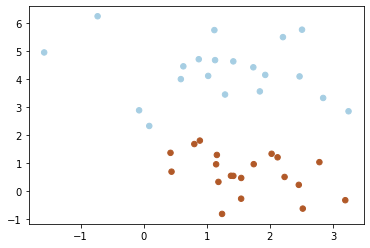

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

In [16]:
X[:, 0]

array([ 0.62835793,  0.89011768,  3.19466821,  3.2460247 ,  2.50904929,
        1.74371499, -0.07228289,  1.54561534,  0.58894326,  1.28933778,
        1.42013331,  2.47034915,  1.84070628,  1.24212124,  1.54446238,
        2.78435808,  2.84382807,  2.52092996,  1.9263585 , -0.73000011,
        1.15980096,  2.45760916,  0.80247216,  2.20656076,  2.23269366,
        1.42094543,  2.02708529,  0.42506917,  0.44136967,  1.38280707,
        1.0220286 ,  1.1312175 ,  1.18447037,  1.7373078 ,  1.14796916,
        0.08848433,  1.12031365,  0.87305123,  2.12178474, -1.57671974])

In [17]:
X[:, 1]

array([ 4.4601363 ,  1.79849015, -0.33716216,  2.84942165,  5.7731461 ,
        0.953829  ,  2.88376939,  0.45958936,  4.00148458,  3.44969159,
        4.63746165,  4.09862906,  3.56162231, -0.82861894, -0.28296852,
        1.02664657,  3.32650945, -0.63858003,  4.15243012,  6.25456272,
        1.28456616,  0.21285357,  1.67515402,  5.50616718,  0.49588272,
        0.53492249,  1.32599553,  1.36044592,  0.68492338,  0.5381105 ,
        4.11660348,  4.68194985,  0.318814  ,  4.42546234,  0.94960906,
        2.32299086,  5.75806083,  4.71438583,  1.20013556,  4.95740592])

In [18]:
clf = LinearSVC().fit(X, y)

In [19]:
decision_function = clf.decision_function(X) # 결정 함수 = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
support_vector_indices = np.where(
    np.abs(decision_function) <= 1 + 1e-15)[0] # 크기가 일반적으로 1로 제한되는 경계
support_vectors = X[support_vector_indices]
support_vectors

array([[ 0.89011768,  1.79849015],
       [ 3.2460247 ,  2.84942165],
       [-0.07228289,  2.88376939],
       [ 2.84382807,  3.32650945],
       [ 1.15980096,  1.28456616],
       [ 0.80247216,  1.67515402],
       [ 2.02708529,  1.32599553],
       [ 0.42506917,  1.36044592],
       [ 0.08848433,  2.32299086],
       [ 2.12178474,  1.20013556]])

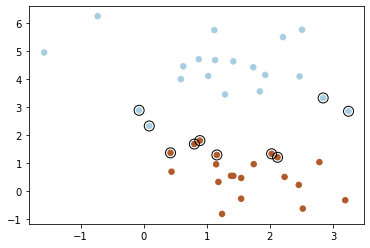

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, # s는 크기, facecolor는 채우기, edgecolor 테두리
                linewidth=1, facecolors='none', edgecolors='k')

C is 1
xlim, ylim
(-1.817856959278668, 3.487161924525187) (-1.182778025647436, 6.608721805933875)
--------------------------------------------------
result of linespace
[-1.81785696 -1.70959127 -1.60132558 -1.49305988 -1.38479419 -1.2765285
 -1.16826281 -1.05999712 -0.95173143 -0.84346574 -0.73520004 -0.62693435
 -0.51866866 -0.41040297 -0.30213728 -0.19387159 -0.0856059   0.0226598
  0.13092549  0.23919118  0.34745687  0.45572256  0.56398825  0.67225395
  0.78051964  0.88878533  0.99705102  1.10531671  1.2135824   1.32184809
  1.43011379  1.53837948  1.64664517  1.75491086  1.86317655  1.97144224
  2.07970793  2.18797363  2.29623932  2.40450501  2.5127707   2.62103639
  2.72930208  2.83756778  2.94583347  3.05409916  3.16236485  3.27063054
  3.37889623  3.48716192]
--------------------------------------------------
result of meshgrid
[[-1.81785696 -1.70959127 -1.60132558 ...  3.27063054  3.37889623
   3.48716192]
 [-1.81785696 -1.70959127 -1.60132558 ...  3.27063054  3.37889623
   3.4

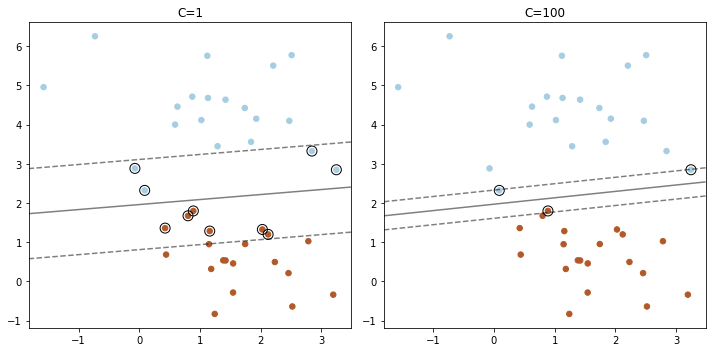

In [21]:
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    print('C is', C)
    clf = LinearSVC(C=C,random_state=42).fit(X, y)
    decision_function = clf.decision_function(X)
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired) # 입력 데이터
    ax = plt.gca()
    xlim = ax.get_xlim() #x 축의 lim
    ylim = ax.get_ylim() #y 축의 lim
    print('xlim, ylim')
    print(xlim, ylim)
    print('-'*50)
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), # meshgrid는 격자를 만들어주는 것 coordinate vectors -> coordinate matrix
                         np.linspace(ylim[0], ylim[1], 50))
    print('result of linespace')
    print(np.linspace(xlim[0], xlim[1], 50)) # 1차원 배열 만들기 ~에서 ~까지, ~개로
    print('-'*50)
    print('result of meshgrid')
    print(xx, yy) 
    print('-'*50)
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    print('shape of Z, xx')
    print(Z.shape)
    print(xx.shape)
    Z = Z.reshape(xx.shape)
    # plt.contour(xx, yy, Z, colors='k', alpha=0.5,
    #            linestyles=['--', '-', '--'])
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, # support vector
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    print('='*50)
plt.tight_layout()
plt.show()

In [22]:
np.linspace(1,3,3)

array([1., 2., 3.])

In [23]:
np.linspace(4,6,3)

array([4., 5., 6.])

In [24]:
a = np.meshgrid([1,2,3] ,[4,5,6])
a

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]), array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]])]

In [25]:
a[0]

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [26]:
a[1]

array([[4, 4, 4],
       [5, 5, 5],
       [6, 6, 6]])

In [27]:
np.meshgrid(np.linspace(1,3,3), np.linspace(4,6,3))

[array([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]), array([[4., 4., 4.],
        [5., 5., 5.],
        [6., 6., 6.]])]

In [28]:
a = np.array([[0,1],
               [2,3]])

In [29]:
a.shape

(2, 2)

In [30]:
a1 = a.ravel()
a1

array([0, 1, 2, 3])

In [31]:
a2 = a.reshape(-1)
a2

array([0, 1, 2, 3])

In [32]:
a3 = a.flatten()
a3

array([0, 1, 2, 3])

In [33]:
a[0][0] = -1

In [34]:
print(a)
print(a1) # 복사 X -> 원본에 영향
print(a2) # 복사 X -> 원본에 영향
print(a3) # 복사 O -> 원본에 영향 X

[[-1  1]
 [ 2  3]]
[-1  1  2  3]
[-1  1  2  3]
[0 1 2 3]


In [35]:
a1[-1] = -4

In [36]:
print(a)
print(a1) # 복사 X -> 원본에 영향
print(a2) # 복사 X -> 원본에 영향
print(a3) # 복사 O -> 원본에 영향 X

[[-1  1]
 [ 2 -4]]
[-1  1  2 -4]
[-1  1  2 -4]
[0 1 2 3]


In [37]:
a = np.linspace(1,3,3)
b = np.linspace(4,6,3)

In [38]:
c1 = np.c_[a, b]
print(c1)
c2 = np.column_stack([a, b]) #vstack 이나 hstack과는 또 다른!
print(c2)

[[1. 4.]
 [2. 5.]
 [3. 6.]]
[[1. 4.]
 [2. 5.]
 [3. 6.]]


In [39]:
names = ['a', 'b', 'c']

for i, name in enumerate(names):
  print(i, name)

0 a
1 b
2 c


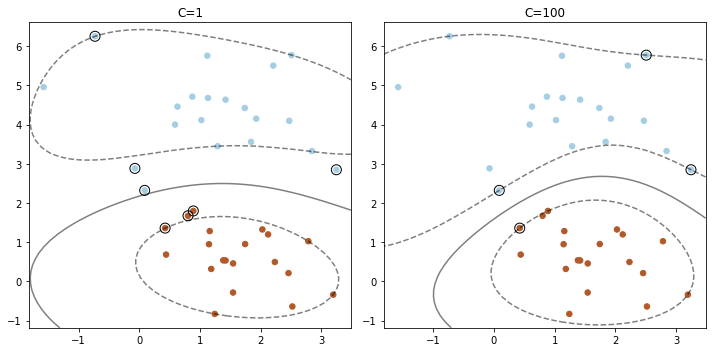

In [40]:
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    clf = SVC(C=C,random_state=42).fit(X, y) # linear -> svm + rbf
    decision_function = clf.decision_function(X)
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired) 
    ax = plt.gca()
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, # support vector
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

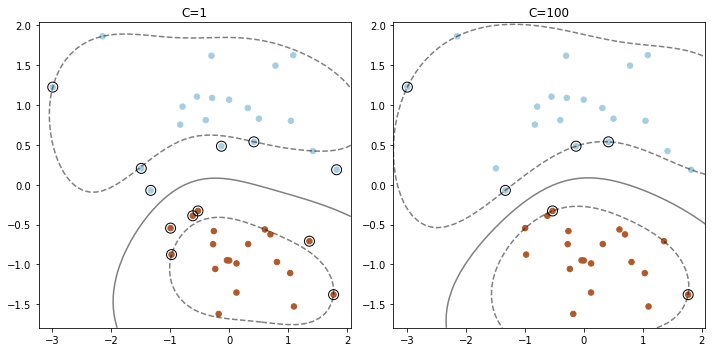

In [41]:
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    X = StandardScaler().fit_transform(X) # scaler 추가
    clf = SVC(C=C,random_state=42).fit(X, y)
    decision_function = clf.decision_function(X)
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired) 
    ax = plt.gca()
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, # support vector
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

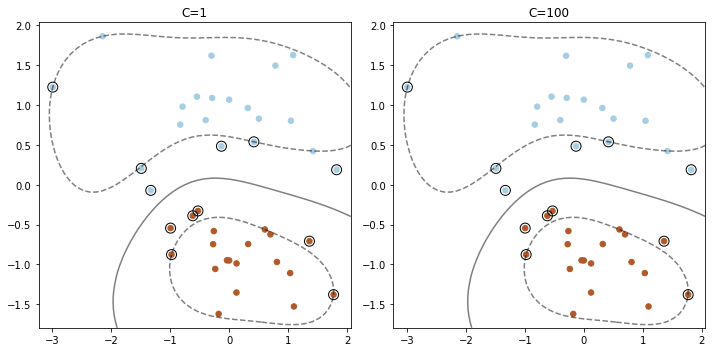

In [42]:
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    #X = StandardScaler().fit_transform(X)
    #clf = SVC(C=C,random_state=42).fit(X, y)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X, y) # pipeline으로 묶기
    decision_function = clf.decision_function(X)
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired) 
    ax = plt.gca()
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, # support vector
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

# K-means 예제

In [43]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs      

In [44]:
# 샘플 데이터 생성

np.random.seed(0)

centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

In [45]:
# k-means clustering 수행

k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
t0 = time.time() # 시간을 체크하기 위한 시작 시간 설정
k_means.fit(X)
t_normal = time.time() - t0 # 학습 후 시간에서 시작 시간을 빼서, 경과한 시간을 기록

In [46]:
# MiniBatch K-means clustering 수행

mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=45,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

In [47]:
k_means_cluster_centers = k_means.cluster_centers_ # cluster의 중심점들

order = pairwise_distances_argmin(k_means.cluster_centers_, # distance가 최소가 되는 것
                                  mbk.cluster_centers_) # 의미: k와 mbk의 cluster의 클러스터가 형성된 클러스터가 다름. 따라서 가장 가까운 센터의 클러스터를 같은 클러스터로 매칭시켜주기 위해서 순서(order)를 구한 것

mbk_means_cluster_centers = mbk.cluster_centers_[order] # kmeans cluster의 순서에 맞게 mini batch kmeans cluster의 순서를 바꾸어 주는 것

k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers) # 입력 데이터에 대해서 가장 가까운 center를 찾아 cluster로 설정
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers) 

In [48]:
k_means_cluster_centers

array([[-1.07262225, -1.00554224],
       [ 1.07510478, -1.06937206],
       [ 0.96786467,  1.0173955 ]])

In [49]:
k_means_labels

array([1, 0, 1, ..., 0, 0, 2])

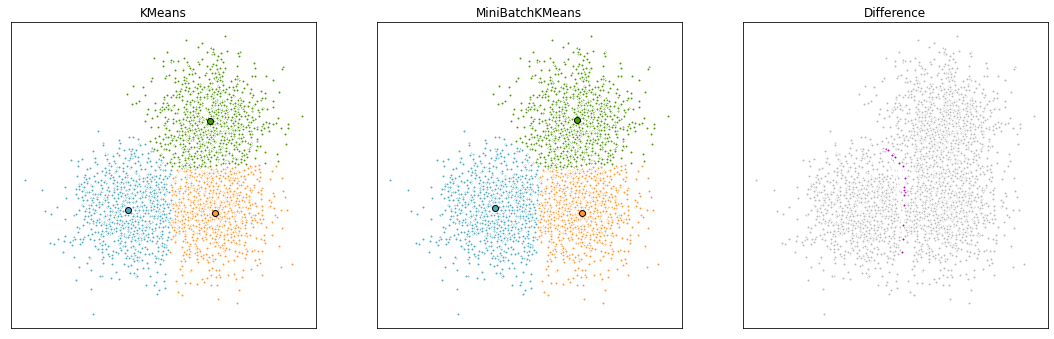

In [50]:
# 그래프로 그리기

fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06'] # hex code

# KMeans
ax = fig.add_subplot(1, 3, 1) # 1 row, 3 col의 그래프 중 첫번째 그래프
for k, color in zip(range(n_clusters), colors): # cluster의 갯수만큼 for loop, color도 동시에 for loop
    my_members = k_means_labels == k # cluster 번호와 동일한 label만 이번의 member로 설정
    cluster_center = k_means_cluster_centers[k] # cluster의 중심값을 가져오고,
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', #해당 cluster의 데이터들 그리기 (색 주의)
            markerfacecolor=color, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=color, # 중심점을 그리기
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2) # 1 row, 3 col의 그래프 중 두번째 그래프
for k, color in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=color, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=color,
            markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())

different = (mbk_means_labels == 4) # 배열의 모든 값을 False로 시작! (데이터 길이가 같게 쉽게 생성)
ax = fig.add_subplot(1, 3, 3) # 1 row, 3 col의 그래프 중 세번째 그래프

for k in range(n_clusters):
    different += ((k_means_labels == k) != (mbk_means_labels == k)) # cluster 별로 돌면서, kmeans와 mini batch kmeans가 예측한 class가 다른 것만 dfferent에 추가

identic = np.logical_not(different) # 다른게 True로 되어있는데, 같은 것을 그래프에 그리기 위해서 not 연산을 통해 반대로 바꿔줌
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.')
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.')
ax.set_title('Difference')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

In [51]:
print(t_normal, t_mini_batch) # 20% 정도의 속도 향상

0.04461503028869629 0.15918612480163574


In [52]:
print('n_clusters:', n_clusters)
print('colors:', colors)
print()
for k, color in zip(range(n_clusters), colors): # 0, 1, 2
  print(k, color)

n_clusters: 3
colors: ['#4EACC5', '#FF9C34', '#4E9A06']

0 #4EACC5
1 #FF9C34
2 #4E9A06


In [53]:
print(k_means_labels)
print(k_means_labels == 0)

[1 0 1 ... 0 0 2]
[False  True False ...  True  True False]


In [54]:
different
identic = np.logical_not(different)
print(different)
print(identic)

[ True False False ... False False False]
[False  True  True ...  True  True  True]


In [55]:
# 정확도 계산 (잘못된)

kmeans_score = np.sum(k_means_labels == labels) / len(labels)
mbkmeans_score = np.sum(mbk_means_labels == labels) / len(labels)

print(kmeans_score)
print(mbkmeans_score)

0.05
0.048666666666666664


In [56]:
# 정확도 계산

order = pairwise_distances_argmin(centers, k_means.cluster_centers_)
k_means_cluster_centers = k_means.cluster_centers_[order]
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers) 

order = pairwise_distances_argmin(centers, mbk.cluster_centers_)
mbk_means_cluster_centers = mbk.cluster_centers_[order]
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers) 

kmeans_score = np.sum(k_means_labels == labels) / len(labels)
mbkmeans_score = np.sum(mbk_means_labels == labels) / len(labels)

print(kmeans_score)
print(mbkmeans_score)

0.9006666666666666
0.8996666666666666


In [57]:
print(mbkmeans_score)
print("%.3f" % mbkmeans_score)
print("%.2f" % round(mbkmeans_score, 2))
print("{:.2f}".format(mbkmeans_score)) 

0.8996666666666666
0.900
0.90
0.90


In [58]:
print(kmeans_score, mbkmeans_score)
print("%.2f %.2f" % (kmeans_score, mbkmeans_score)) #%c, %s, %i %f
print("%.2f %.2f" % (round(kmeans_score, 2), round(mbkmeans_score, 2)))
print("{:.2f} {:.2f}".format(kmeans_score, mbkmeans_score)) # <- 개인적으로 가장 선호하는 방법, 하지만 모두 읽고 이해할 수 있어야함!

0.9006666666666666 0.8996666666666666
0.90 0.90
0.90 0.90
0.90 0.90


In [59]:
print(kmeans_score, '%', mbkmeans_score, '%')
print("%.2fscore%% %.2f%%" % (kmeans_score, mbkmeans_score)) #%c, %s, %i %f
print("%.2f%% %.2f%%" % (round(kmeans_score, 2), round(mbkmeans_score, 2)))
print("{:.2f}% {:.2f}%".format(kmeans_score, mbkmeans_score)) # <- 개인적으로 가장 선호하는 방법, 하지만 모두 읽고 이해할 수 있어야함!

0.9006666666666666 % 0.8996666666666666 %
0.90score% 0.90%
0.90% 0.90%
0.90% 0.90%


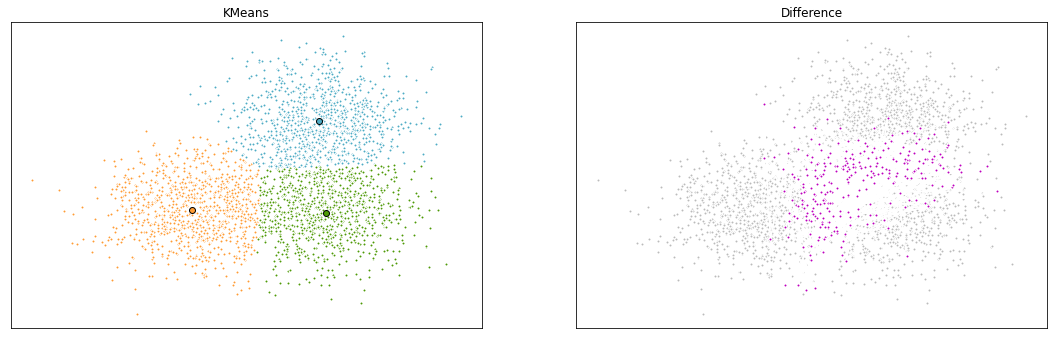

In [60]:
# 그래프로 그리기

fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06'] # hex code

# KMeans
ax = fig.add_subplot(1, 2, 1) # 1 row, 3 col의 그래프 중 첫번째 그래프
for k, color in zip(range(n_clusters), colors): # cluster의 갯수만큼 for loop, color도 동시에 for loop
    my_members = k_means_labels == k # cluster 번호와 동일한 label만 이번의 member로 설정
    cluster_center = k_means_cluster_centers[k] # cluster의 중심값을 가져오고,
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', #해당 cluster의 데이터들 그리기 (색 주의)
            markerfacecolor=color, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=color, # 중심점을 그리기
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())

different = (mbk_means_labels == 4) # 배열의 모든 값을 False로 시작! (데이터 길이가 같게 쉽게 생성)
ax = fig.add_subplot(1, 2, 2) # 1 row, 3 col의 그래프 중 세번째 그래프

for k in range(n_clusters):
    different += ((k_means_labels == k) != (labels == k)) # cluster 별로 돌면서, kmeans와 mini batch kmeans가 예측한 class가 다른 것만 dfferent에 추가

identic = np.logical_not(different) # 다른게 True로 되어있는데, 같은 것을 그래프에 그리기 위해서 not 연산을 통해 반대로 바꿔줌
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.')
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.')
ax.set_title('Difference')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

# MeanShift

In [61]:
from sklearn.cluster import MeanShift
import numpy as np

In [62]:
X = np.array([[1, 1], [2, 1], [1, 0],
               [4, 7], [3, 5], [3, 6]])
clustering = MeanShift(bandwidth=2).fit(X)
clustering.labels_

array([1, 1, 1, 0, 0, 0])

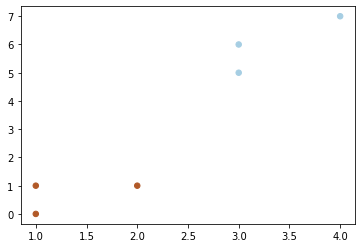

In [63]:
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, s=30, cmap=plt.cm.Paired)

In [64]:
clustering.predict([[0, 0], [5, 5]])

array([1, 0])

In [65]:
X = np.array([[1, 1], [2, 1], [1, 0],
               [4, 7], [3, 5], [3, 6]])
clustering = MeanShift(bandwidth=1).fit(X)
clustering.labels_

array([0, 0, 0, 2, 1, 1])

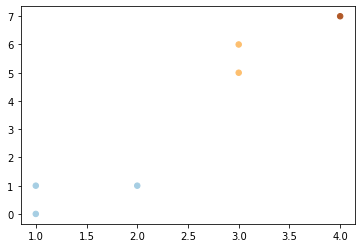

In [66]:
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, s=30, cmap=plt.cm.Paired)

In [67]:
X = np.array([[1, 1], [2, 1], [1, 0],
               [4, 7], [3, 5], [3, 6]])
clustering = MeanShift(bandwidth=2).fit(X)
clustering.labels_

array([1, 1, 1, 0, 0, 0])

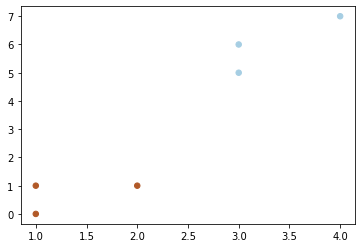

In [68]:
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, s=30, cmap=plt.cm.Paired)

In [69]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle

In [70]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [71]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500) 
# bandwidth를 입력하지 않으면, 이게 자동으로 실행되어 최적의 값을 추정해주는 것
# 이렇게 수동으로 하게 되면 parameter를 조정해볼 수 있음
# 이 함수는 kernel의 밀도를 추정할 때 사용하는 것인데, kNN을 기반으로 이루어짐
# quantile 값은 [0, 1] 사이의 값. 0.5는 모든 pair별 거리의 중앙값이 사용됨을 의미

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


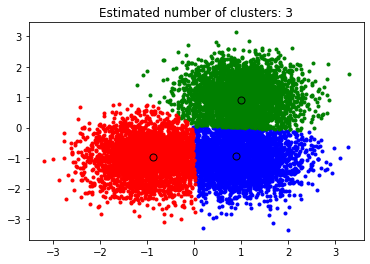

In [72]:
plt.figure(1)
plt.clf() # clears the entire current figure

colors = cycle('bgrcmyk') # 갯수에 상관없이 iteration 가능함. n_cluster의 갯수가 달라질 수 있는데, 매칭시킬 필요가 없다는 장점! 하지만, 갯수가 초과하면 같은 색이 나올 수 있으므로 주의!
for k, color in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], color + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=color,
             markeredgecolor='k', markersize=7)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [73]:
for color in colors:
  print(color, end=', ')

c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b, g, r, c, m, y, k, b

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-73-c4c069ee82e3>", line 2, in <module>
    print(color, end=', ')
  File "/usr/local/lib/python3.7/dist-packages/ipykernel/iostream.py", line 400, in write
    self.pub_thread.schedule(lambda : self._buffer.write(string))
  File "/usr/local/lib/python3.7/dist-packages/ipykernel/iostream.py", line 203, in schedule
    self._event_pipe.send(b'')
  File "/usr/local/lib/python3.7/dist-packages/zmq/sugar/socket.py", line 547, in send
    return super(Socket, self).send(data, flags=flags, copy=copy, track=track)
  File "zmq/backend/cython/socket.pyx", line 718, in zmq.backend.cython.socket.Socket.send
  File "zmq/backend/cython/socket.pyx", line 765, in zmq.backend.cython.socket.Socket.send
  File "zmq/backend/cython/socket.pyx", line 242, in zmq.backend.cython.socket._send_copy

KeyboardInterrupt: ignored